# Comparisson of freezing temperature Panan vs OM2

MOM5 and MOM6 use slightly different equations to define the freezing temperature of seawater. let's see how different theya re

In [1]:
import cosima_cookbook as cc
from cosima_cookbook import distributed as ccd
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
import xarray as xr
import glob,os
import cmocean.cm as cmocean

import logging
logging.captureWarnings(True)
logging.getLogger('py.warnings').setLevel(logging.ERROR)

from dask.distributed import Client

In [47]:
#salinity and pressure ranges
s=np.tile(np.arange(25,40,0.03),[500,1]) #for salinity
p= np.tile(np.arange(0,5000,10),[500,1]).T #for pressure in dbn

In [48]:
#CONSTANTS FOR MOM6 -
P_Tfr0=0
P_a=-0.054
P_b=0.0


In [49]:
#CONSTANTS FOR MOM5 - made as a rational function
#! tfreeze (deg C) = tf_num/tf_den
#! tf_num  =  a0 + s*(a1 + sqrt(s)*(a2 + sqrt(s)*a3)) + p*(a4 + p*(a5 + s*a6)) 
#! tf_dem  =  b0 + p*(b1 + p*b2) + s*s*sqrt(s)*b3

a0 =  2.5180516744541290e-03 
a1 = -5.8545863698926184e-02
a2 =  2.2979985780124325e-03
a3 = -3.0086338218235500e-04
a4 = -7.0023530029351803e-04
a5 =  8.4149607219833806e-09
a6 =  1.1845857563107403e-11

b0 =  1.0000000000000000e+00
b1 = -3.8493266309172074e-05
b2 =  9.1686537446749641e-10
b3 =  1.3632481944285909e-06


In [50]:
# Freezing temperature for panan

P_Tf=(P_Tfr0+P_a*s)+P_b*p

In [53]:
#For OM2
tf_num  =  a0 + s*(a1 + np.sqrt(s)*(a2 + np.sqrt(s)*a3)) + p*(a4 + p*(a5 + s*a6)) 
tf_den  =  b0 + p*(b1 + p*b2) + s*s*np.sqrt(s)*b3

OM2_tfreeze  = tf_num/tf_den

In [31]:
#test for For OM2
s0=35
p0=200
tf_num0  =  a0 + s0*(a1 + np.sqrt(s0)*(a2 + np.sqrt(s0)*a3)) + p0*(a4 + p0*(a5 + s0*a6)) 
tf_den0  =  b0 + p0*(b1 + p0*b2) + s0*s0*np.sqrt(s0)*b3

OM20_tfreeze = tf_num0/tf_den0
OM20_tfreeze

-2.074408175943127

it matches the model one

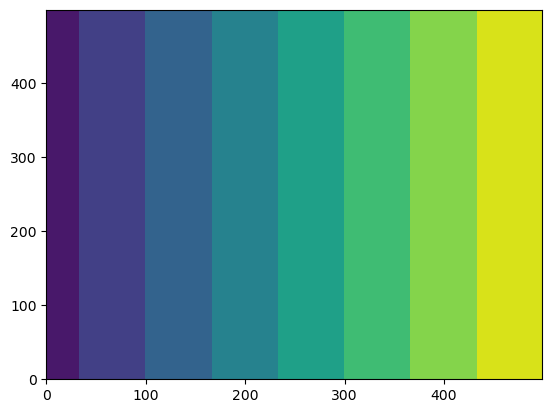

In [90]:
plt.contourf(s)

Text(0.5, 0, 'salinity')

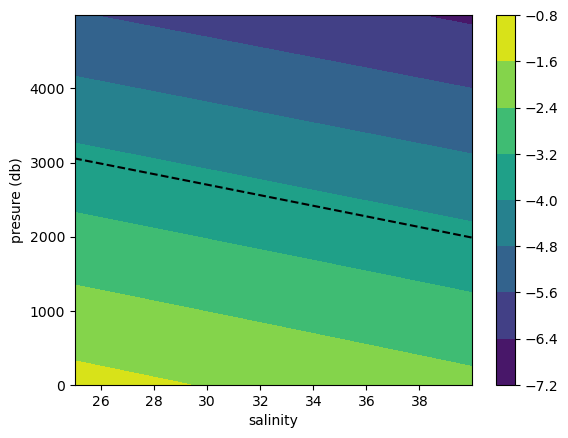

In [92]:
plt.contourf(s,p,OM2_tfreeze); plt.colorbar()
plt.contour(s,p,OM2_tfreeze,[-3.82],colors='black');
plt.ylabel('presure (db)'); plt.xlabel('salinity')

Text(0.5, 0, 'salinity')

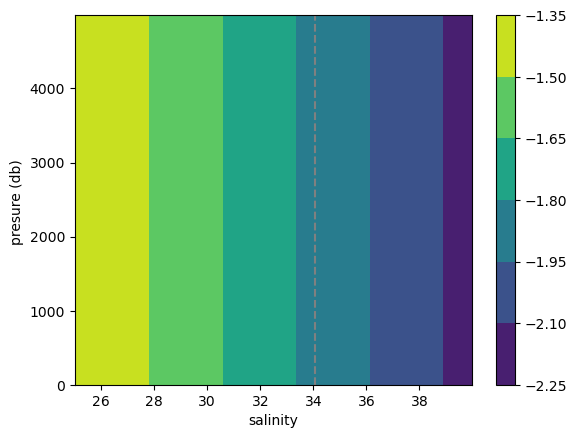

In [93]:
plt.contourf(s,p,P_Tf); plt.colorbar()
plt.contour(s,p,P_Tf,[-3.82],colors='black');
plt.contour(s,p,P_Tf,[-1.84],colors='grey');
plt.ylabel('presure (db) '); plt.xlabel('salinity')

Text(0.5, 1.0, 'MOM6-MOM5')

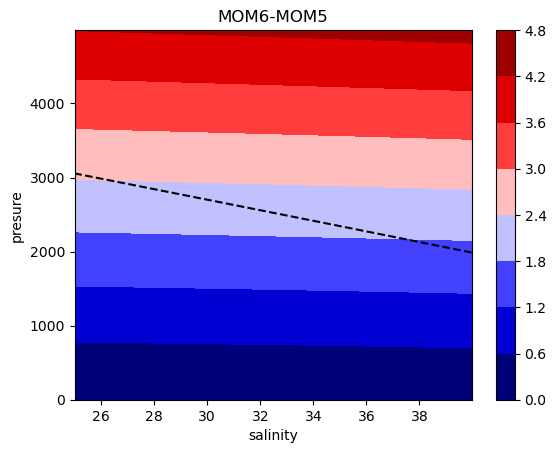

In [87]:
plt.contourf(s,p,P_Tf-OM2_tfreeze, cmap='seismic'); plt.colorbar()
plt.contour(s,p,OM2_tfreeze,[-3.82],colors='black');
plt.ylabel('presure'); plt.xlabel('salinity')
plt.title('MOM6-MOM5')

Using the freezing temperature of -3.82C is too low for panan. Especially because the 3.82C Tempe


So when we discount the freezing temperature here, all transport gets positive. 




The caveat here is that depending of the value of the freezing temperature we use, we might find completely different results in terms of total CSHT.

Lets consider the freezing point at p=2500, to see how it differs between equations

In [82]:
p[250,0]

2500

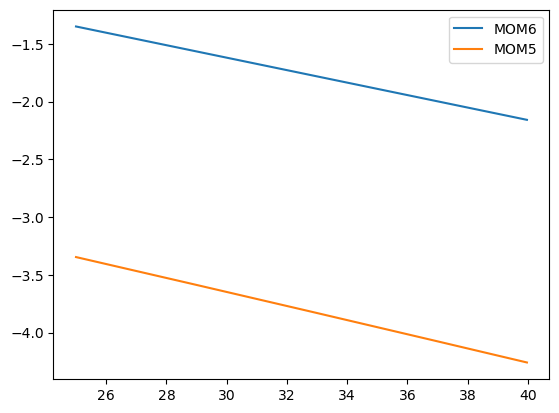

In [83]:
plt.plot(s[250,:],P_Tf[250,:],label='MOM6')
plt.plot(s[250,:],OM2_tfreeze[250,:],label='MOM5')
plt.legend()

Considering taht we chose to use a Linear MOM6 equation where the freezing temeprature do not depend on depth, I believe that the only correction that needsd to be made in relation to the freezing point, is to correct towards the freezing point of the seawater (about 1.84C)